In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


**Loading dataset**

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"del Carlo, Mr. Sebastiano",male,1601,G6,S
freq,1,577,7,4,644


In [8]:
#Removing some unnecssary columns
train_df.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)
test_df.drop(['Name','Cabin','Ticket'],axis=1,inplace=True)

**Handling missing values**

In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

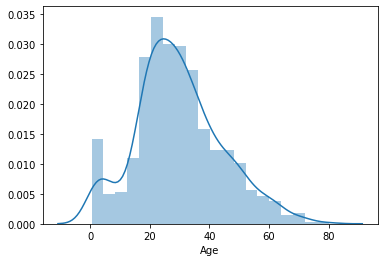

In [11]:
sns.distplot(train_df['Age'])

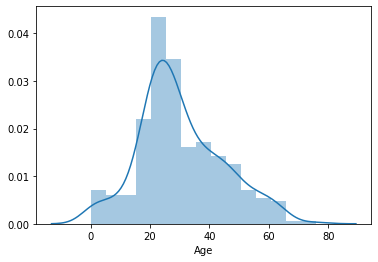

In [12]:
sns.distplot(test_df['Age'])

In [13]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())

In [14]:
train_df[train_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [15]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
train_df['Embarked']=train_df['Embarked'].fillna('S')

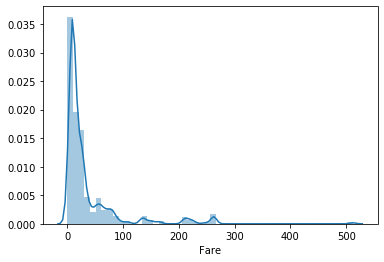

In [17]:
sns.distplot(test_df['Fare'])

In [18]:
test_df['Fare']=test_df['Fare'].fillna(test_df['Fare'].mean())

# Data Exploration

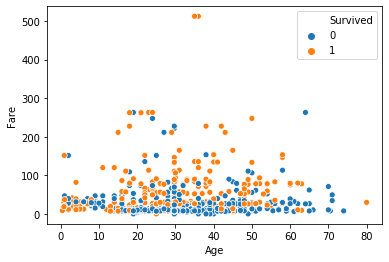

In [19]:
sns.scatterplot(train_df['Age'],train_df['Fare'],hue=train_df['Survived'])

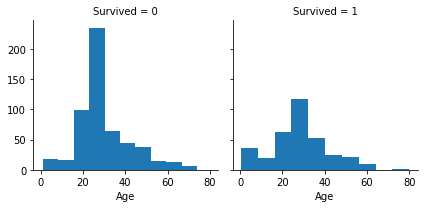

In [20]:
fg=sns.FacetGrid(train_df,col='Survived')
fg.map(plt.hist,'Age')

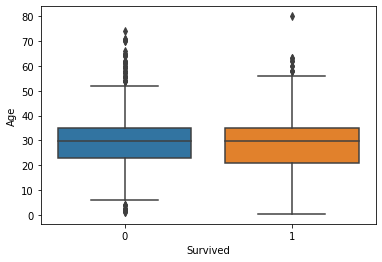

In [21]:
 sns.boxplot(x='Survived',y='Age', data=train_df)

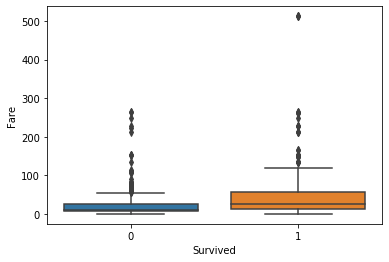

In [22]:
 sns.boxplot(x='Survived',y='Fare', data=train_df)

In [23]:
##Survived Vs Sex 
train_df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


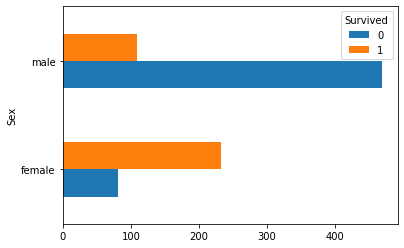

In [24]:
pd.crosstab(train_df['Sex'],train_df['Survived']).plot(kind='barh')

In [25]:
#Survive Vs Pclass
train_df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


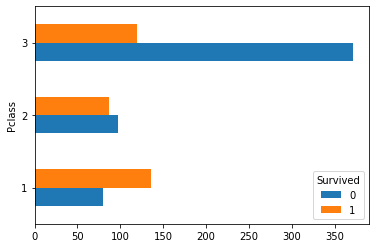

In [26]:
pd.crosstab(train_df['Pclass'],train_df['Survived']).plot(kind='barh')

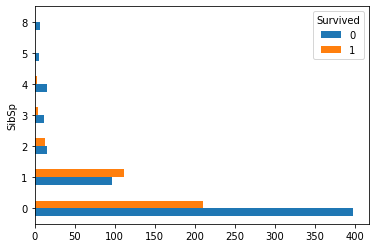

In [27]:
pd.crosstab(train_df['SibSp'],train_df['Survived']).plot(kind='barh')

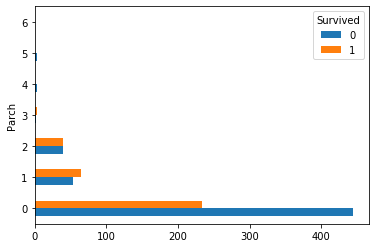

In [28]:
pd.crosstab(train_df['Parch'],train_df['Survived']).plot(kind='barh')

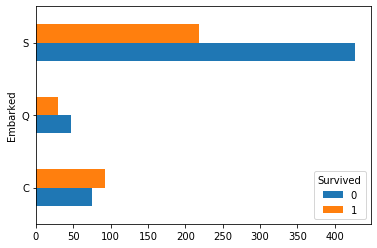

In [29]:
pd.crosstab(train_df['Embarked'],train_df['Survived']).plot(kind='barh')

# Feature engineering

In [30]:
#Label encoding for sex variables
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [31]:
#Label encoding for Embarked variables
encoder=LabelEncoder()
train_df['Embarked']=encoder.fit_transform(train_df['Embarked'])
test_df['Embarked']=encoder.transform(test_df['Embarked'])

In [32]:
#one hot encoding for Embarked variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
OHEncoder=OneHotEncoder()
train_Embarked=pd.DataFrame(OHEncoder.fit_transform(train_df[['Embarked']]).toarray())
test_Embarked=pd.DataFrame(OHEncoder.fit_transform(test_df[['Embarked']]).toarray())
train_df = pd.concat([train_df, train_Embarked], axis=1)
test_df = pd.concat([test_df, test_Embarked], axis=1)

In [33]:
train_df.drop(['Embarked',2],axis=1,inplace=True)
test_df.drop(['Embarked',2],axis=1,inplace=True)

In [34]:
train_df['Pclass'].replace([1,3],[3,1],inplace=True)
test_df['Pclass'].replace([1,3],[3,1],inplace=True)

In [35]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] 
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] 
train_df.drop(['SibSp','Parch'],axis=1,inplace=True)
test_df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [36]:
x_train=train_df.iloc[:, 2:9].values
y_train=train_df.iloc[:, 1].values
x_test=test_df.iloc[:, 1:8].values

In [37]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_train=std_scaler.fit_transform(x_train)
x_test=std_scaler.transform(x_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

# Random Forest

In [39]:
param_grid={'n_estimators':[200,400,600,800],
            'max_features':['sqrt'],
             'max_depth':[300,400,500,600,700],
             'min_samples_split':[5,6,7,8,10],
             'min_samples_leaf':[1,2,3],
             'criterion':['entropy']
            }

In [40]:
# rf=RandomForestClassifier()
# rf_gsc=GridSearchCV(estimator=rf,param_grid=param_grid,cv=8,verbose=2,n_jobs=-1)
# rf_gsc.fit(x_train,y_train)

In [41]:
# rf_rgsc.best_estimator_

In [42]:
RF_classifier=RandomForestClassifier(criterion='entropy', max_depth=500, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200)
RF_classifier.fit(x_train,y_train)
y_pred2=RF_classifier.predict(x_test)

In [43]:
print('Accuarcy: ', accuracy_score(y_train,RF_classifier.predict(x_train)))
print(f'---------------Confusion Matrix---------\n {confusion_matrix(y_train,RF_classifier.predict(x_train))}')
print(f'---------------------Classification Report--------\n {pd.DataFrame(classification_report(y_train,RF_classifier.predict(x_train),output_dict=True))}')

Accuarcy:  0.8967452300785634
---------------Confusion Matrix---------
 [[520  29]
 [ 63 279]]
---------------------Classification Report--------
                     0           1  accuracy   macro avg  weighted avg
precision    0.891938    0.905844  0.896745    0.898891      0.897276
recall       0.947177    0.815789  0.896745    0.881483      0.896745
f1-score     0.918728    0.858462  0.896745    0.888595      0.895595
support    549.000000  342.000000  0.896745  891.000000    891.000000


In [44]:
submission2= pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':y_pred2})
filename = 'Titanic_survival_prediction1.csv'
submission2.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: Titanic_survival_prediction1.csv


# SVC

In [67]:
param_grid={
    'C':[5,8,10,13,17,20],
    'gamma':[0.5,0.1,0.05,0.01],
    'kernel':['rbf']
}


In [ ]:
#'rbf', 'sigmoid' 'poly'

In [68]:
svc=SVC()
svc_gsc=GridSearchCV(estimator=svc,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
svc_gsc.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [5, 8, 10, 13, 17, 20],
                         'gamma': [0.5, 0.1, 0.05, 0.01], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [69]:
svc_gsc.best_estimator_

SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False

In [ ]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred3=svc.predict(x_test)

In [ ]:
print('Accuarcy: ', accuracy_score(y_train,svc.predict(x_train)))
print(f'---------------Confusion Matrix---------\n {confusion_matrix(y_train,svc.predict(x_train))}')
print(f'---------------------Classification Report--------\n {pd.DataFrame(classification_report(y_train,svc.predict(x_train),output_dict=True))}')

In [ ]:
submission3= pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':y_pred3})
filename = 'Titanic_survival_prediction3.csv'
submission3.to_csv(filename,index=False)
print('Saved file: ' + filename)